# Plots for paper

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import sys
try:
    sys.path.remove("../py_src") # Hacky way to add higher directory to python modules path. 
except:
    pass
sys.path.append("../py_src") # Means that I dont have to make src/ a proper python package

## 1. Single run example - true parameters


We can generate some synthetic data, and run the Kalman filter to see how well we recover the state.

The Kalman filter depends on a series of physical parameters (e.g. GW angular frequency). 

Lets assume we know these perfectly, and see how the filter does.

In [4]:
from system_parameters import SystemParameters
from pulsars import Pulsars

from synthetic_data import SyntheticData
from plotting import plot_statespace,plot_all
from model import LinearModel
from kalman_filter import KalmanFilter
from bilby_wrapper import BilbySampler
from priors import priors_dict,bilby_priors_dict

Model likelihood is:  -34817.9531829044


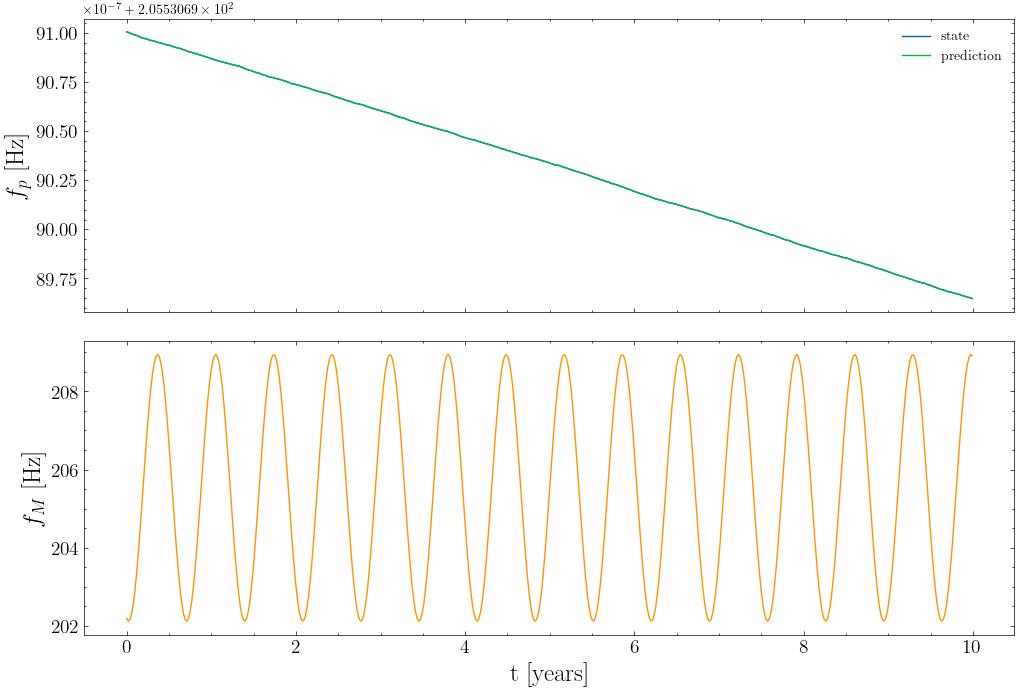

In [4]:
import numpy as np 

P    = SystemParameters()       #define the system parameters as a class
PTA  = Pulsars(P)               #setup the PTA
data = SyntheticData(PTA,P) #generate some synthetic data

#Define the model 
model = LinearModel

#Initialise the Kalman filter
KF = KalmanFilter(model,data.f_measured,PTA)

# Run the KFwith the correct parameters
true_parameters = priors_dict(PTA,P)
model_likelihood, model_state_predictions = KF.likelihood_and_states(true_parameters)
print("Model likelihood is: ", model_likelihood)
plot_all(PTA.t, data.intrinsic_frequency, data.f_measured, model_state_predictions, 1)


Cool! This works well. The predicted state and the true state are perfectly overlaid.



## 2. Single run example - wrong parameters


Now lets do the same thing again, but this time with the wrong parameters.

Lets just change $\omega$ from its true value of $5 \times 10^{-7}$ Hz to $1 \times 10^{-7}$ Hz.


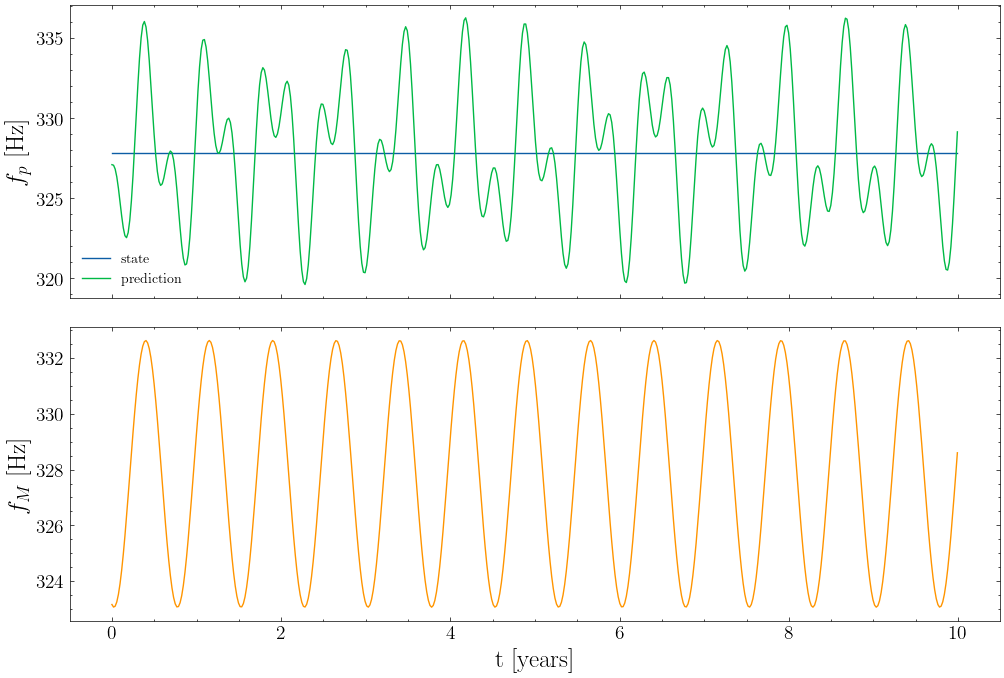

Model likelihood is:  -3.3678919458984035e+23


In [434]:
wrong_parameters = true_parameters.copy()
#wrong_parameters["omega_gw"] = 1e-7
eps = np.finfo(float).eps
wrong_parameters["delta_gw"] = 1.1

model_likelihood,model_predictions = KF.likelihood_and_states(wrong_parameters)
plot_all(PTA.t,data.intrinsic_frequency,data.f_measured,model_predictions,psr_index =0)
print("Model likelihood is: ", model_likelihood)

### Corner Plot

Median values:
omega_gw          5.002693e-07
phi0_gw           1.924655e-01
psi_gw            2.492013e+00
iota_gw           7.997871e-01
delta_gw          9.994957e-01
                      ...     
gamma46           1.000000e-13
sigma_p           1.000000e-03
sigma_m           1.000000e-10
log_likelihood   -2.274994e+04
log_prior         1.097242e+01
Length: 199, dtype: float64


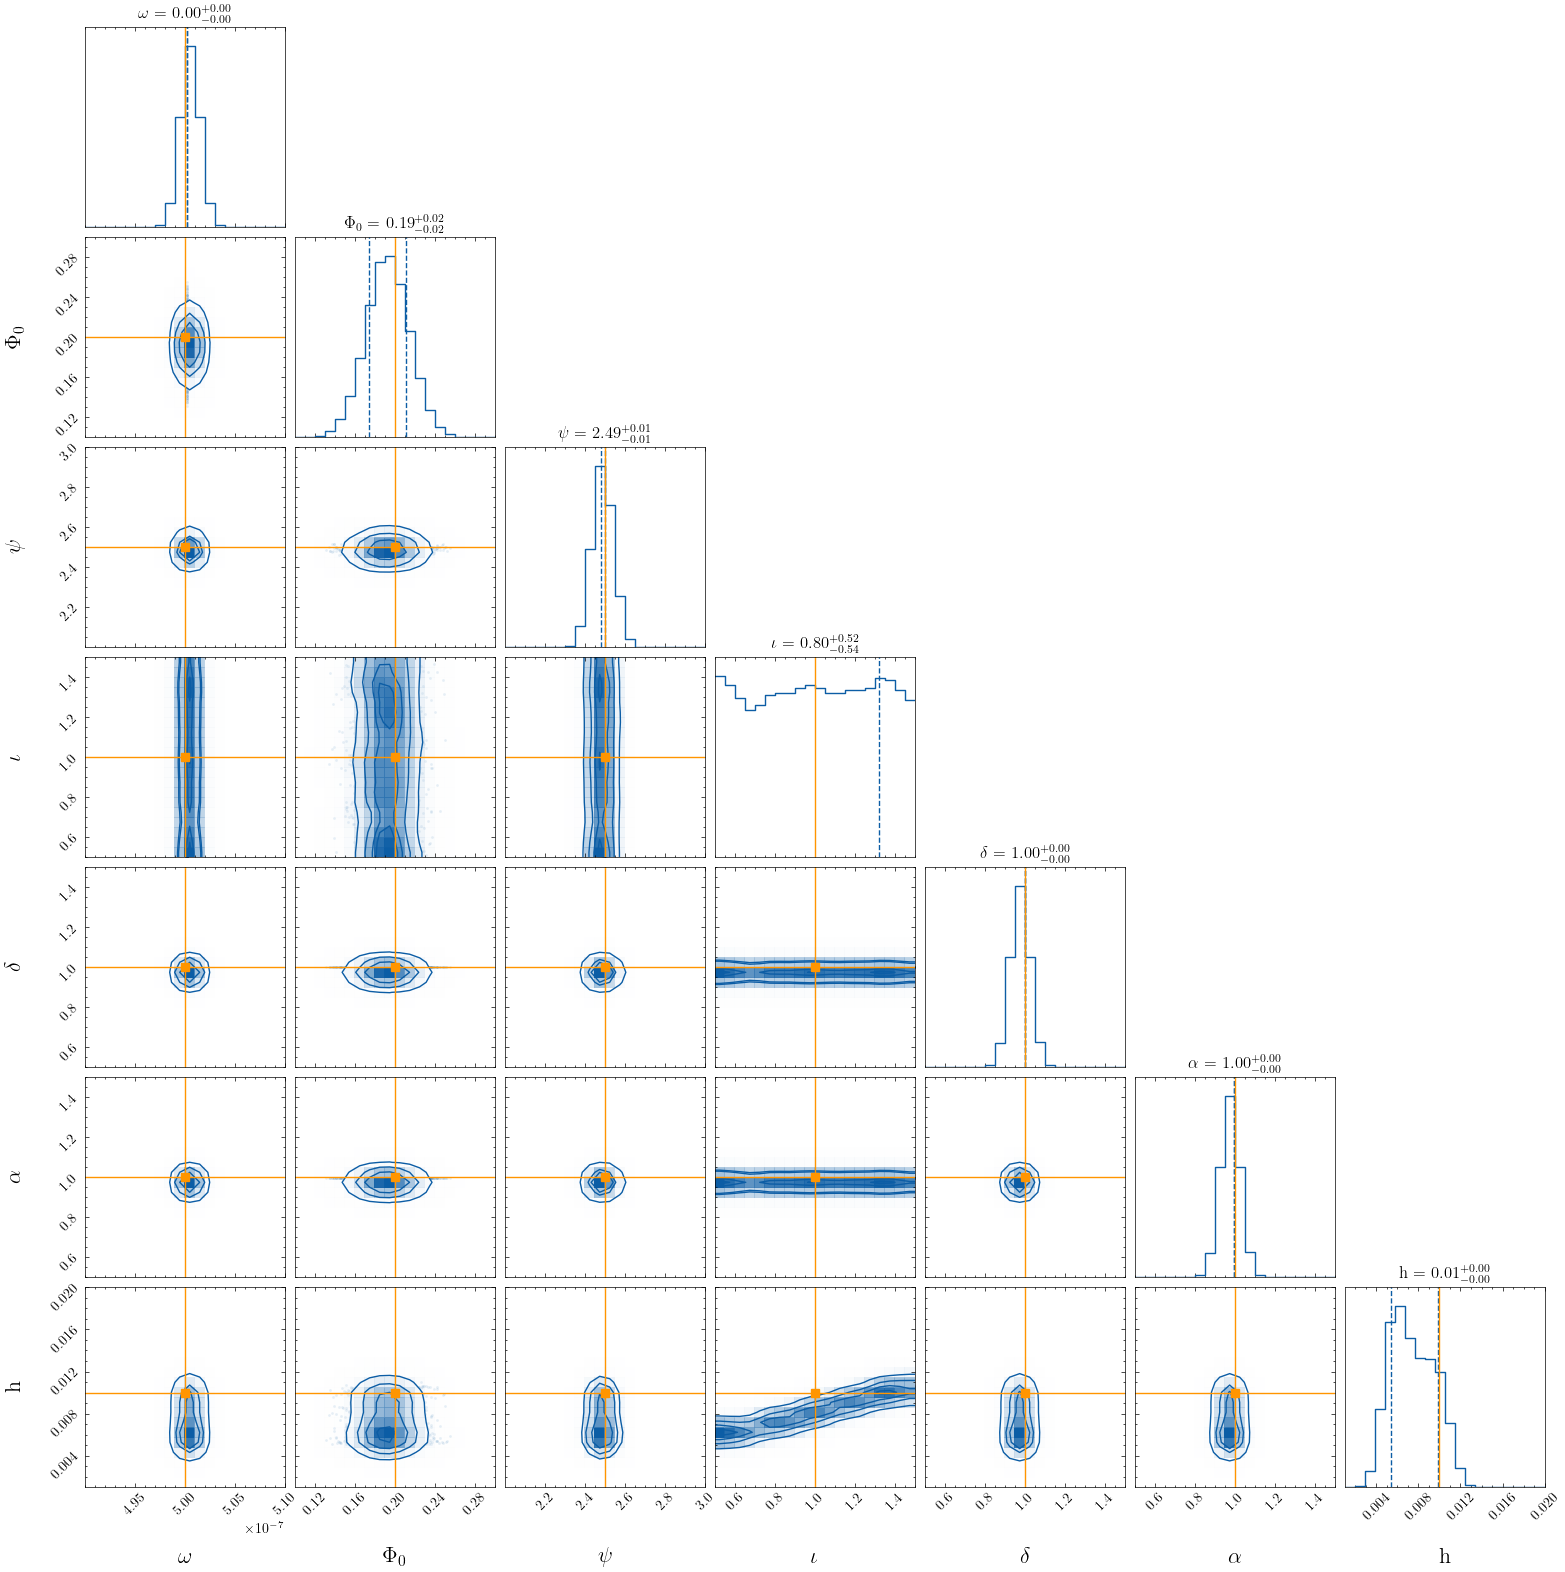

In [19]:
from plotting import plot_custom_corner


path = "../data/nested_sampling/AllParams_result.json"




ranges = [(4.9e-7,5.1e-7),(0.10,0.30),(2.0,3.0),(0.5,1.5),(0.5,1.5),(0.5,1.5),(1e-3,2e-2)]

injection_parameters = [5e-7,0.20,2.50,1.0,1.0,1.0,1e-2]
labels = [r'$\omega$',r'$\Phi_0$',r'$\psi$',r'$\iota$', r'$\delta$',r'$\alpha$',r'h']
variables_to_plot = ["omega_gw","phi0_gw","psi_gw","iota_gw","delta_gw","alpha_gw", "h"]
axes_scales = ["log", "linear","linear","linear","linear","linear","log"]

plot_custom_corner(path,variables_to_plot,labels,injection_parameters,ranges,axes_scales,savefig=None)

### Appendix

Number of samples:
2272
Median values:
omega_gw    5.002618e-07
phi0_gw     1.635204e-01
psi_gw      2.680448e+00
iota_gw     7.785566e-01
delta_gw    1.053037e+00
alpha_gw    1.162756e+00
h           7.410484e-03
f00         3.278470e+02
f01         2.055307e+02
f02         3.030910e+02
dtype: float64


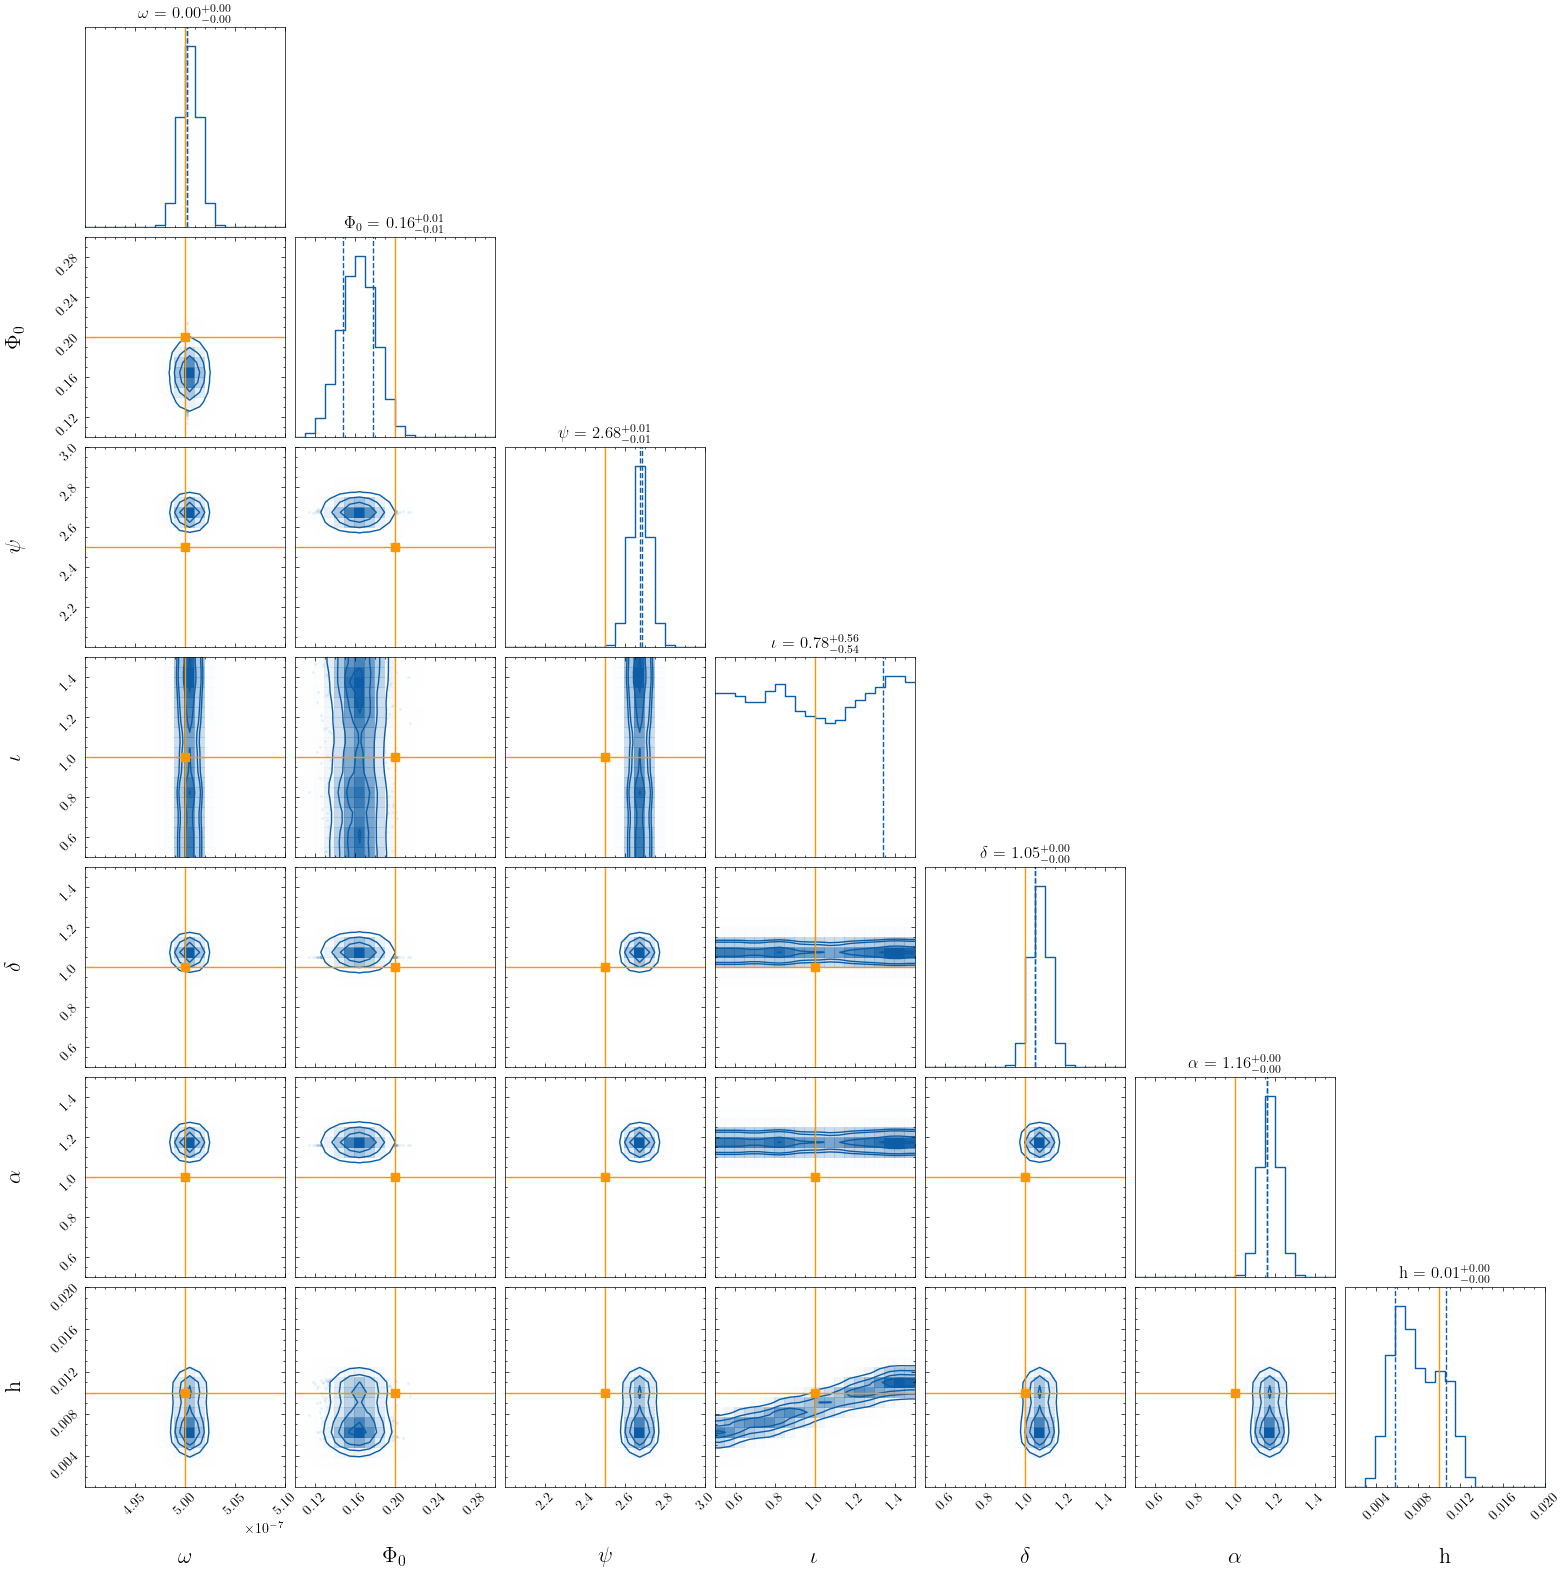

In [15]:
from plotting import plot_custom_corner
import numpy as np 

#path = "../data/nested_sampling/AllParamsReRun_result.json"
#path = "../data/nested_sampling/MCMC_unthinned_result.json"
path = "../data/nested_sampling/exponential_form_dynestyV2_result.json"
#path = "../data/nested_sampling/MCMC_small_h_5000_v2_result.json"
#path = "../data/nested_sampling/AllParamsRerunV7_result.json"
#path = "../data/nested_sampling/MCMC_small_h_result.json"







ranges = [(4.9e-7,5.1e-7),(0.10,0.30),(2.0,3.0),(0.5,1.5),(0.5,1.5),(0.5,1.5),(1e-3,2e-2)]
#ranges = [(1e-9,1e-5),(0.0,np.pi),(0.0,np.pi),(0.0,np.pi/2),(0.0,np.pi/2),(0.0,np.pi),(1e-11,1e-9)]

injection_parameters = [5e-7,0.20,2.50,1.0,1.0,1.0,1e-2]
labels = [r'$\omega$',r'$\Phi_0$',r'$\psi$',r'$\iota$', r'$\delta$',r'$\alpha$',r'h']
variables_to_plot = ["omega_gw","phi0_gw","psi_gw","iota_gw","delta_gw","alpha_gw", "h"]
axes_scales = ["log", "linear","linear","linear","linear","linear","log"]

plot_custom_corner(path,variables_to_plot,labels,injection_parameters,ranges,axes_scales,savefig=None)



Number of samples:
1723
Median values:
omega_gw    5.000000e-07
phi0_gw     2.019111e-01
psi_gw      2.499340e+00
iota_gw     1.000000e+00
delta_gw    1.000000e+00
alpha_gw    1.000000e+00
h           1.000000e-02
f00         3.278470e+02
f01         2.055307e+02
f02         3.030910e+02
dtype: float64


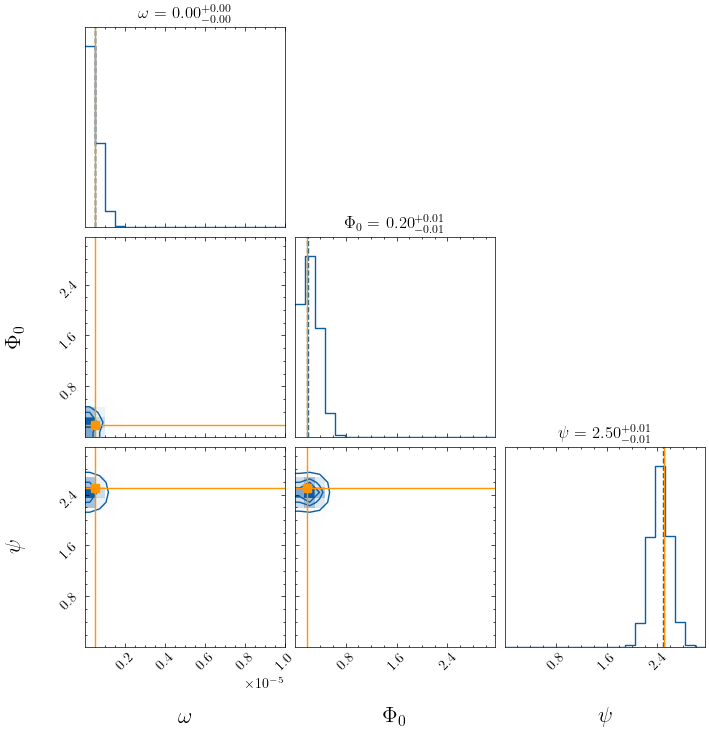

In [13]:
from plotting import plot_custom_corner
path = "../data/nested_sampling/three_params_result.json"
labels = [r'$\omega$', r'$\Phi_0$',r'$\psi$']
injection_parameters = [5e-7,0.20,2.50]
axes_scales = ["log", "linear","linear"]




variables_to_plot = ["omega_gw","phi0_gw","psi_gw"]
ranges = [(1e-9,1e-5),(0.0,np.pi),(0.0,np.pi)]

plot_custom_corner(path,variables_to_plot,labels,injection_parameters,ranges,axes_scales,savefig=None)


                 0         1         2         3         4
0     5.000001e-07  0.226085  2.485014  0.692189  0.008224
1     5.000003e-07  0.200596  2.502673  0.402938  0.006275
2     5.000001e-07  0.263687  2.524285  0.747684  0.008057
3     5.000000e-07  0.253071  2.522318  0.537010  0.006814
4     5.000000e-07  0.151534  2.516755  0.094789  0.006033
...            ...       ...       ...       ...       ...
1843  5.000000e-07  0.213655  2.489809  0.218418  0.006221
1844  5.000000e-07  0.207975  2.490773  1.534574  0.012193
1845  5.000000e-07  0.210269  2.496463  0.338259  0.006432
1846  5.000000e-07  0.207570  2.492480  0.128286  0.006111
1847  5.000000e-07  0.209064  2.494139  1.155815  0.010473

[1848 rows x 5 columns]
          omega_gw   phi0_gw    psi_gw   iota_gw         h  delta_gw  \
0     5.000001e-07  0.226085  2.485014  0.692189  0.008224       1.0   
1     5.000003e-07  0.200596  2.502673  0.402938  0.006275       1.0   
2     5.000001e-07  0.263687  2.524285  0.747684  0

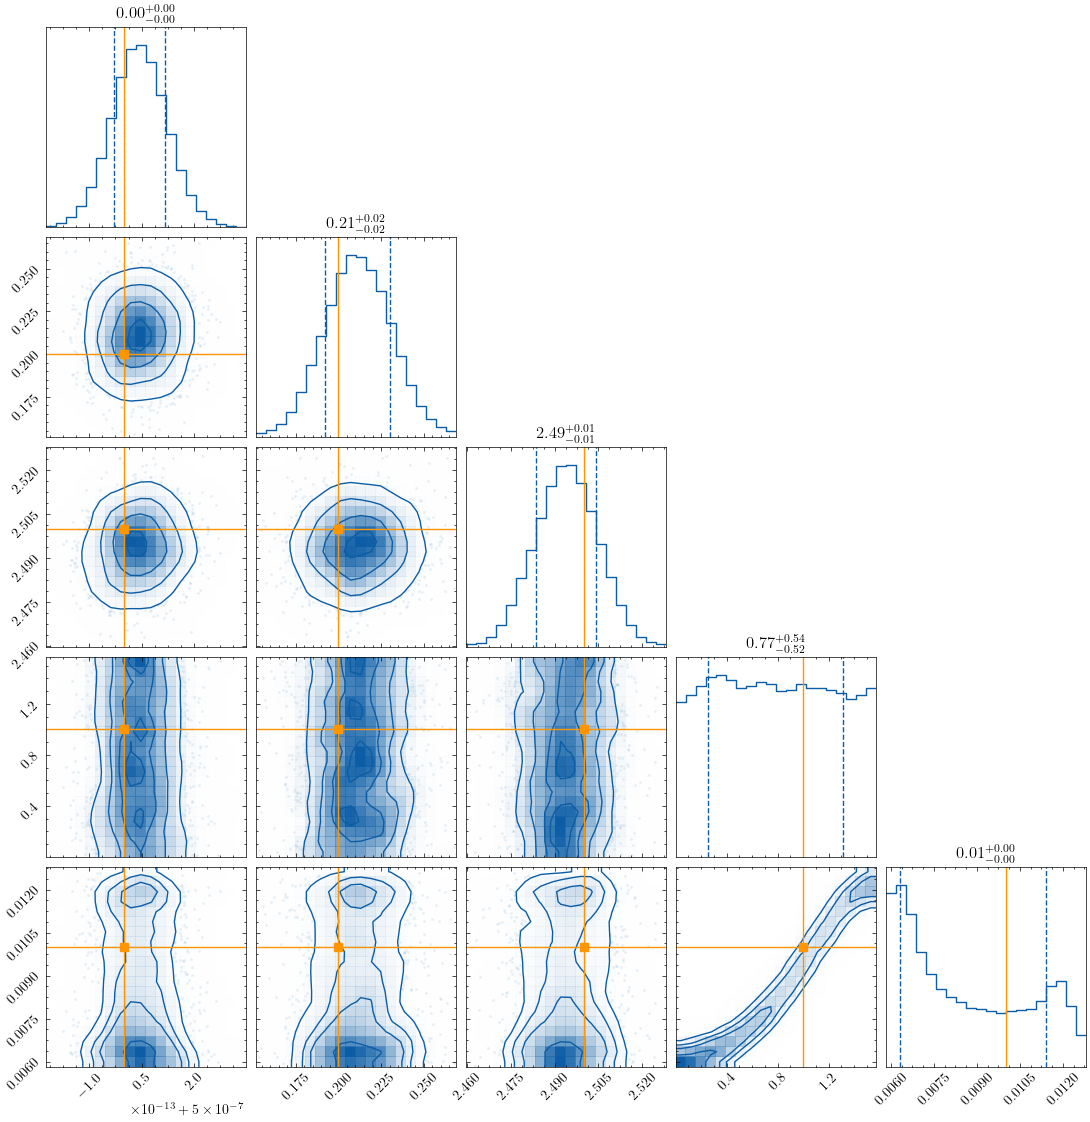

In [4]:
from plotting import plot_custom_corner
path = "../data/nested_sampling/random_walk10_ozstar_result.json"
labels = [r'$\omega$', r'$\Phi_0$',r'$\psi$', r'$\iota$', r'h']
injection_parameters = [5e-7,0.20,2.50,1.0,1e-2]
axes_scales = ["log", "linear","linear","linear","log"]
plot_custom_corner(path,labels, injection_parameters,axes_scales,savefig=None)

                 0         1         2         3         4
0     5.000000e-07  0.219832  2.539852  1.179019  0.010683
1     5.000000e-07  0.212628  2.530256  0.345362  0.006265
2     5.000000e-07  0.143122  2.481811  0.280041  0.006524
3     5.000000e-07  0.168374  2.499333  1.018440  0.010166
4     5.000002e-07  0.264233  2.517356  0.920655  0.008636
...            ...       ...       ...       ...       ...
1852  5.000000e-07  0.210625  2.491355  0.562953  0.007067
1853  5.000000e-07  0.206982  2.492242  1.420552  0.011889
1854  5.000000e-07  0.215343  2.494789  0.566247  0.007111
1855  5.000000e-07  0.210628  2.492092  1.155155  0.010480
1856  5.000000e-07  0.208332  2.492998  0.526669  0.006954

[1857 rows x 5 columns]
          omega_gw   phi0_gw    psi_gw   iota_gw         h  delta_gw  \
0     5.000000e-07  0.219832  2.539852  1.179019  0.010683       1.0   
1     5.000000e-07  0.212628  2.530256  0.345362  0.006265       1.0   
2     5.000000e-07  0.143122  2.481811  0.280041  0

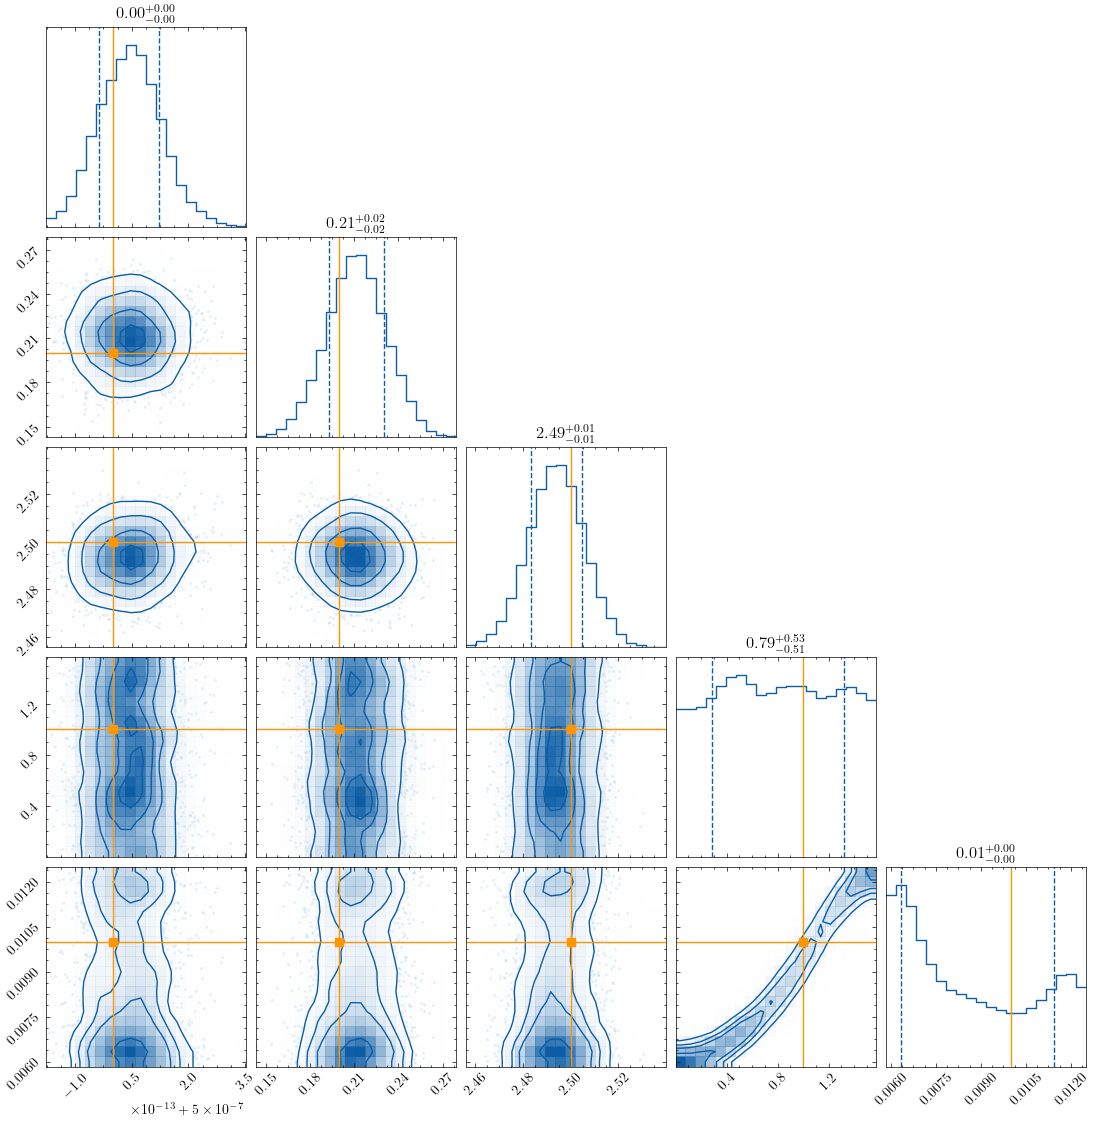

In [5]:
from plotting import plot_custom_corner
path = "../data/nested_sampling/Fig3Example_result.json"
labels = [r'$\omega$', r'$\Phi_0$',r'$\psi$', r'$\iota$', r'h']
injection_parameters = [5e-7,0.20,2.50,1.0,1e-2]
axes_scales = ["log", "linear","linear","linear","log"]
plot_custom_corner(path,labels, injection_parameters,axes_scales,savefig=None)

                 0         1         2         3
0     5.005906e-07  1.000725  0.999250  0.008174
1     5.005913e-07  1.000725  0.999243  0.008443
2     5.005925e-07  1.000730  0.999246  0.008070
3     5.005866e-07  1.000719  0.999261  0.007998
4     5.005877e-07  1.000720  0.999255  0.007604
...            ...       ...       ...       ...
2228  5.004578e-07  1.000925  0.997605  0.010443
2229  5.004578e-07  1.000925  0.997605  0.010439
2230  5.004579e-07  1.000925  0.997604  0.010398
2231  5.004580e-07  1.000926  0.997604  0.010473
2232  5.004579e-07  1.000925  0.997604  0.010466

[2233 rows x 4 columns]
          omega_gw  delta_gw  alpha_gw         h  phi0_gw  psi_gw  iota_gw  \
0     5.005906e-07  1.000725  0.999250  0.008174      0.2     2.5      1.0   
1     5.005913e-07  1.000725  0.999243  0.008443      0.2     2.5      1.0   
2     5.005925e-07  1.000730  0.999246  0.008070      0.2     2.5      1.0   
3     5.005866e-07  1.000719  0.999261  0.007998      0.2     2.5      1.0 

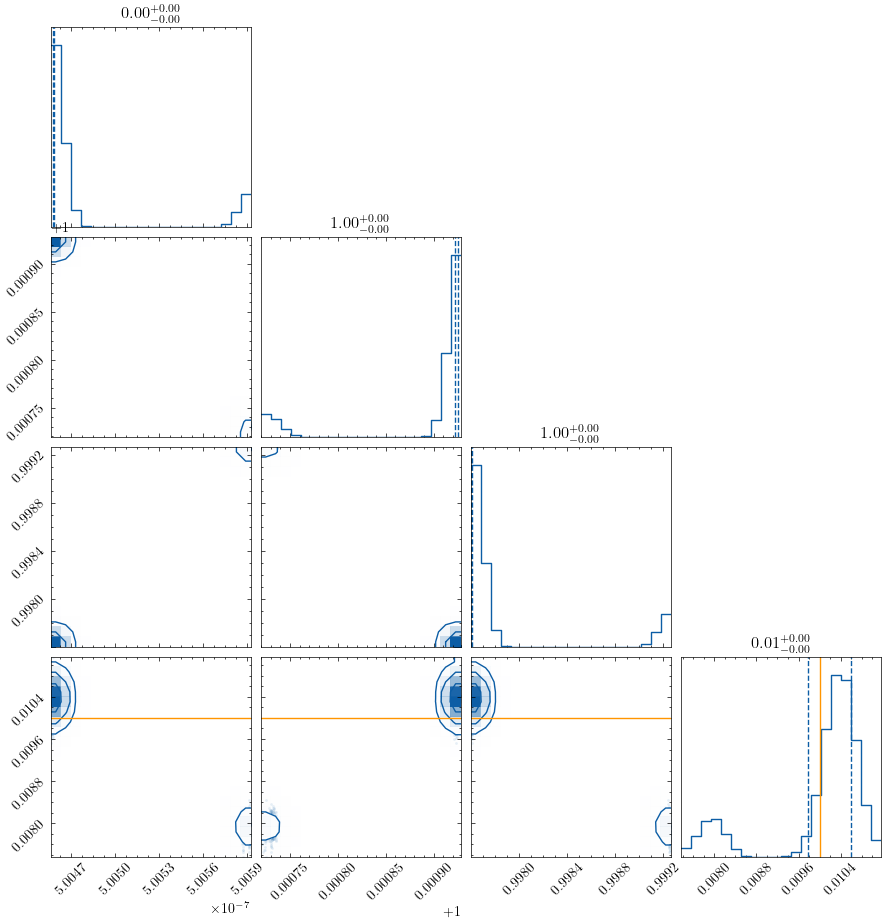

In [ ]:
from plotting import plot_custom_corner
path = "../data/nested_sampling/FourParams_result.json"
labels = [r'$\omega$', r'$\delta$',r'$\alpha$',r'h']
injection_parameters = [5e-7,1.0,1.0,1e-2]
axes_scales = ["log", "linear","linear","log"]
plot_custom_corner(path,labels, injection_parameters,axes_scales,savefig=None)

In [5]:
from plotting import plot_custom_corner
path = "../data/nested_sampling/AllParams_result.json"

labels = [r'$\omega$',r'$\Phi_0$',r'$\psi$',r'$\iota$' r'$\delta$',r'$\alpha$',r'h']
injection_parameters = [5e-7,0.20,2.50,1.0,1.0,1.0,1e-2]
axes_scales = ["log", "linear","linear","linear","linear","linear","log"]
plot_custom_corner(path,labels, injection_parameters,axes_scales,savefig=None)

The size of the posterior df is
2115
The size of the samples df is
2115
Median values:
omega_gw          5.002693e-07
phi0_gw           1.924655e-01
psi_gw            2.492013e+00
iota_gw           7.997871e-01
delta_gw          9.994957e-01
                      ...     
gamma46           1.000000e-13
sigma_p           1.000000e-03
sigma_m           1.000000e-10
log_likelihood   -2.274994e+04
log_prior         1.097242e+01
Length: 199, dtype: float64


KeyboardInterrupt: 

In [70]:
# Opening JSON file

import json 
import pandas as pd 
#path = "../data/nested_sampling/AllParamsReRun_result.json"
#path = "../data/nested_sampling/MCMC_unthinned_result.json"
path = "../data/nested_sampling/AllParamsRerunV7_result.json"
#path = "../data/nested_sampling/MCMC_small_h_result.json"

f = open(path)

# returns JSON object as 
# a dictionary
data = json.load(f)

#Make it a dataframe. Nice for surfacing
df_posterior = pd.DataFrame(data["posterior"]["content"]) # posterior
df_samples = pd.DataFrame(data["samples"]["content"]) # posterior

y_post = df_posterior.to_numpy() 
y_samp = df_samples.to_numpy() 

In [71]:
df_posterior

,omega_gw,phi0_gw,psi_gw,iota_gw,delta_gw,alpha_gw,h,f00,f01,f02,...,gamma41,gamma42,gamma43,gamma44,gamma45,gamma46,sigma_p,sigma_m,log_likelihood,log_prior
0,5.001899e-07,0.297994,2.520707,1.537332,0.998898,0.998826,0.013079,327.847021,205.530699,303.090979,...,1.000000e-13,1.000000e-13,1.000000e-13,1.000000e-13,1.000000e-13,1.000000e-13,0.001,1.000000e-10,-22751.212414,10.354722
1,5.001902e-07,0.294470,2.501715,0.908552,0.998899,0.998824,0.008716,327.847021,205.530699,303.090979,...,1.000000e-13,1.000000e-13,1.000000e-13,1.000000e-13,1.000000e-13,1.000000e-13,0.001,1.000000e-10,-22748.263741,10.760530
2,5.001896e-07,0.209545,2.496632,0.468023,0.998897,0.998824,0.007080,327.847021,205.530699,303.090979,...,1.000000e-13,1.000000e-13,1.000000e-13,1.000000e-13,1.000000e-13,1.000000e-13,0.001,1.000000e-10,-22748.054069,10.968434
3,5.001895e-07,0.281096,2.456645,0.999320,0.998904,0.998835,0.009013,327.847021,205.530699,303.090979,...,1.000000e-13,1.000000e-13,1.000000e-13,1.000000e-13,1.000000e-13,1.000000e-13,0.001,1.000000e-10,-22747.959212,10.727002
4,5.001894e-07,0.259976,2.516030,1.371407,0.998902,0.998833,0.010932,327.847021,205.530699,303.090979,...,1.000000e-13,1.000000e-13,1.000000e-13,1.000000e-13,1.000000e-13,1.000000e-13,0.001,1.000000e-10,-22747.745916,10.534051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2196,5.001897e-07,0.226827,2.487852,0.906816,0.998901,0.998830,0.008917,327.847021,205.530699,303.090979,...,1.000000e-13,1.000000e-13,1.000000e-13,1.000000e-13,1.000000e-13,1.000000e-13,0.001,1.000000e-10,-22737.400105,10.737740
2197,5.001898e-07,0.227812,2.483706,0.497104,0.998901,0.998829,0.006782,327.847021,205.530699,303.090979,...,1.000000e-13,1.000000e-13,1.000000e-13,1.000000e-13,1.000000e-13,1.000000e-13,0.001,1.000000e-10,-22737.384958,11.011372
2198,5.001897e-07,0.231654,2.487471,0.649139,0.998900,0.998829,0.007511,327.847021,205.530699,303.090979,...,1.000000e-13,1.000000e-13,1.000000e-13,1.000000e-13,1.000000e-13,1.000000e-13,0.001,1.000000e-10,-22737.349421,10.909370
2199,5.001898e-07,0.236974,2.486243,0.577149,0.998900,0.998828,0.007154,327.847021,205.530699,303.090979,...,1.000000e-13,1.000000e-13,1.000000e-13,1.000000e-13,1.000000e-13,1.000000e-13,0.001,1.000000e-10,-22737.291883,10.958051


In [69]:
df_samples

,0,1,2,3,4,5,6
0,5.001899e-07,0.297994,2.520707,1.537332,0.998898,0.998826,0.013079
1,5.001902e-07,0.294470,2.501715,0.908552,0.998899,0.998824,0.008716
2,5.001896e-07,0.209545,2.496632,0.468023,0.998897,0.998824,0.007080
3,5.001895e-07,0.281096,2.456645,0.999320,0.998904,0.998835,0.009013
4,5.001894e-07,0.259976,2.516030,1.371407,0.998902,0.998833,0.010932
...,...,...,...,...,...,...,...
2196,5.001897e-07,0.226827,2.487852,0.906816,0.998901,0.998830,0.008917
2197,5.001898e-07,0.227812,2.483706,0.497104,0.998901,0.998829,0.006782
2198,5.001897e-07,0.231654,2.487471,0.649139,0.998900,0.998829,0.007511
2199,5.001898e-07,0.236974,2.486243,0.577149,0.998900,0.998828,0.007154


In [48]:
y_post = df_posterior[["omega_gw","phi0_gw","psi_gw","iota_gw","delta_gw","alpha_gw", "h"]].to_numpy()

In [58]:
df_posterior.h.min()

1.0018090966506007e-11

In [51]:
y_post.shape

(1202, 7)

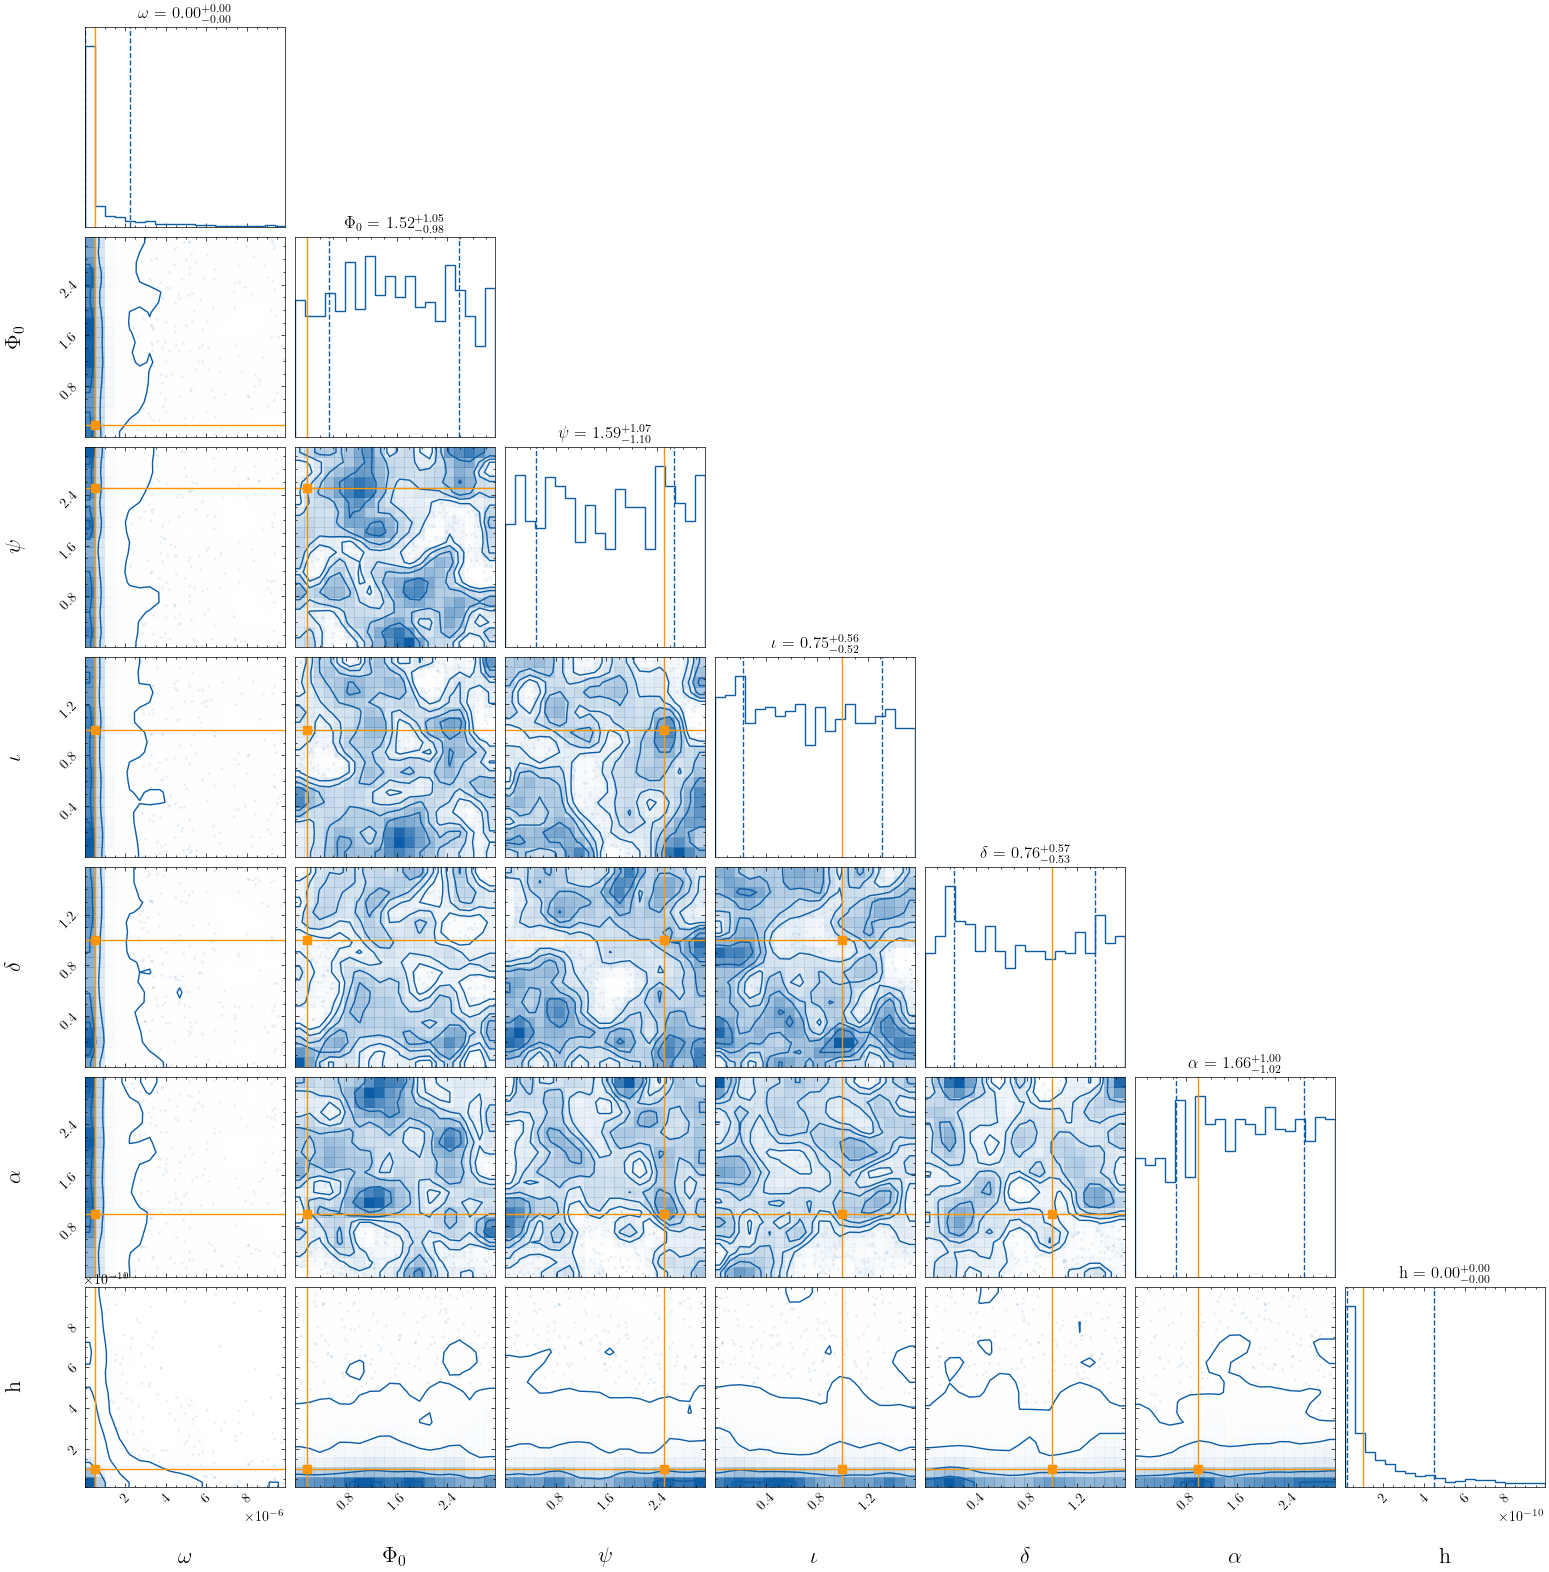

In [63]:
#ranges = [(4.9e-7,5.1e-7),(0.10,0.30),(2.0,3.0),(0.5,1.5),(0.5,1.5),(0.5,1.5),(1e-11,1e-9)]
injection_parameters = [5e-7,0.20,2.50,1.0,1.0,1.0,1e-10]

fig = corner.corner(y_post, color='C0',
                        show_titles=True,smooth=True,truth_color='C2',
                        quantiles=[0.16, 0.84],
                        truths = injection_parameters,
                        labels = labels,
                        label_kwargs=dict(fontsize=16))


/Users/t1/miniconda3/envs/KalmanGW/lib/python3.10/site-packages/corner/core.py:583: RuntimeWarning: invalid value encountered in divide
  sm /= sm[-1]


KeyboardInterrupt: 

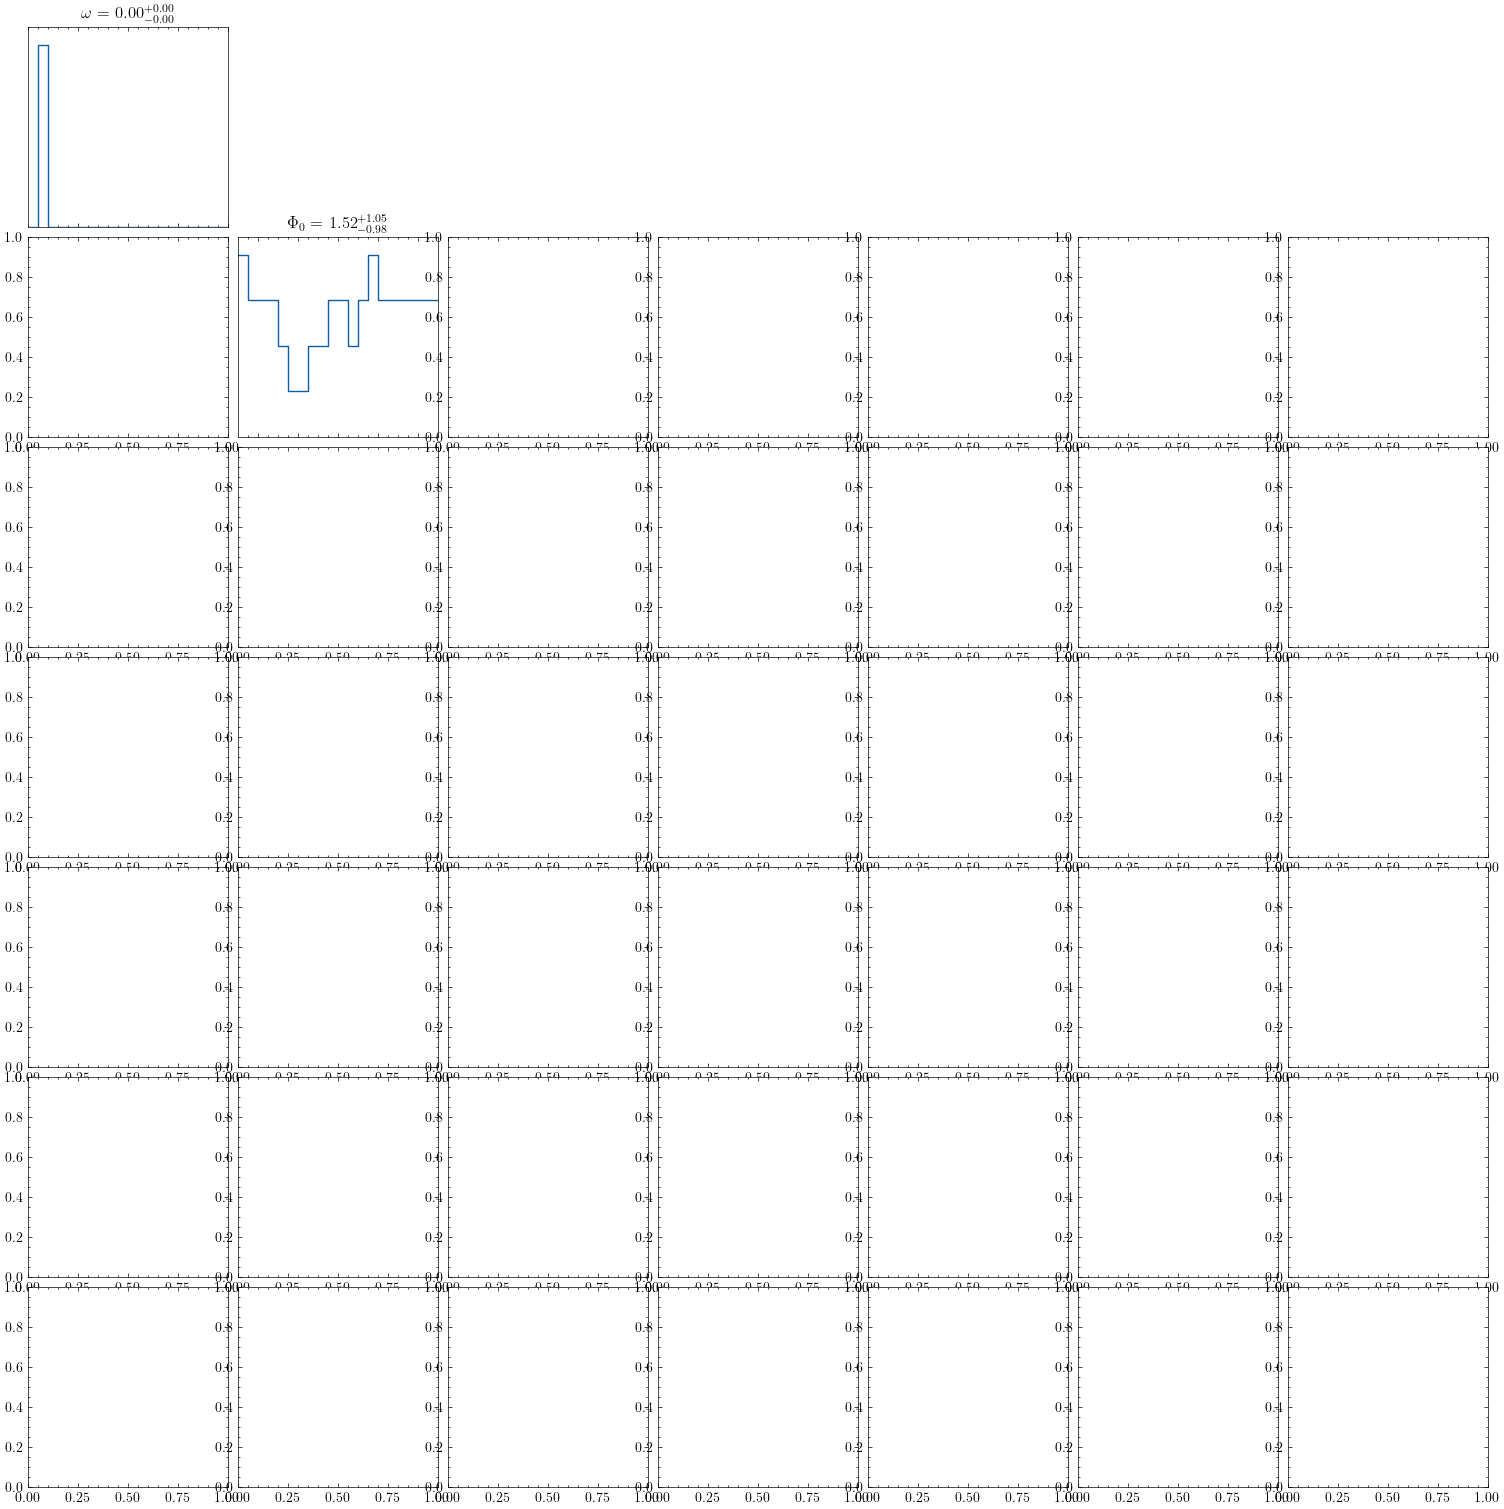

In [49]:
import corner 
import scienceplots
import matplotlib.pyplot as plt 


ranges = [(4.9e-7,5.1e-7),(0.10,0.30),(2.0,3.0),(0.5,1.5),(0.5,1.5),(0.5,1.5),(1e-3,2e-2)]
injection_parameters = [5e-7,0.20,2.50,1.0,1.0,1.0,1e-2]
labels = [r'$\omega$',r'$\Phi_0$',r'$\psi$',r'$\iota$', r'$\delta$',r'$\alpha$',r'h']



plt.style.use('science')


fig = corner.corner(y_post,
                        color='C0',
                        show_titles=True,
                        smooth=True, 
                        smooth1d=True,
                        range=ranges,
                        truth_color='C2',
                        quantiles=[0.16, 0.84],
                        truths = injection_parameters,
                        labels = labels,
                        label_kwargs=dict(fontsize=16)
                        )


plt.savefig(f"../data/images/canonical_example.png", bbox_inches="tight",dpi=300)







#all_axes = fig.get_axes()


#ax = all_axes[0]

#ax.set_xscale('log')
#ax.set_xlim(5.0e-7-5.003e-7,5.003e-7)
#print(all_axes)

In [1]:
import json 
import pandas as pd 
#path = "../data/nested_sampling/AllParamsReRun_result.json"
#path = "../data/nested_sampling/MCMC_unthinned_result.json"
path = "../data/nested_sampling/AllParamsRerunV7_result.json"
#path = "../data/nested_sampling/MCMC_small_h_result.json"

f = open(path)

# returns JSON object as 
# a dictionary
data = json.load(f)

#Make it a dataframe. Nice for surfacing
df_posterior = pd.DataFrame(data["posterior"]["content"]) # posterior
df_samples = pd.DataFrame(data["samples"]["content"]) # posterior

y_post = df_posterior.to_numpy() 
y_samp = df_samples.to_numpy() 

In [2]:
import corner 
import scienceplots
import matplotlib.pyplot as plt 


ranges = [(4.9e-7,5.1e-7),(0.10,0.30),(2.0,3.0),(0.5,1.5),(0.5,1.5),(0.5,1.5),(1e-3,2e-2)]
injection_parameters = [5e-7,0.20,2.50,1.0,1.0,1.0,1e-2]
labels = [r'$\omega$',r'$\Phi_0$',r'$\psi$',r'$\iota$', r'$\delta$',r'$\alpha$',r'h']



plt.style.use('science')


fig = corner.corner(y_post,
                        color='C0',
                        show_titles=True,
                        smooth=True, 
                        smooth1d=True,
                        range=ranges,
                        truth_color='C2',
                        quantiles=[0.16, 0.84],
                        truths = injection_parameters,
                        labels = labels,
                        label_kwargs=dict(fontsize=16)
                        )


plt.savefig(f"../data/images/canonical_example.png", bbox_inches="tight",dpi=300)







#all_axes = fig.get_axes()


#ax = all_axes[0]

#ax.set_xscale('log')
#ax.set_xlim(5.0e-7-5.003e-7,5.003e-7)
#print(all_axes)

KeyboardInterrupt: 

## 3.2 Example B: a few more parameters, a few less pulsars 

Lets try a different example where we try to recover more parameters and we use fewer pulsars:
